In [1]:
import pandas as pd

# Define column headers
columns = [
    "start_date", "station_name", "charging_time_hh_mm_ss", "energy_kwh",
    "address_1", "address_2", "city", "state_province", "zip_postal_code",
    "fee", "model_number", "latitude", "longitude", "geopoint"
]

# Load the original CSV file, treating the first line as data if it contains no headers
input_file_path = 'C:\\Users\\prana\\Downloads\\electric-vehicle-charging-stations 2000.csv'  # Replace with your actual file path
data = pd.read_csv(input_file_path, header=None)

# Remove the first row
data = data.iloc[1:]

if set(data.iloc[0]) == set(columns):
    # Drop the first row if it matches the headers
    data = data.iloc[1:]

# Split the single column into multiple columns based on semicolon delimiter
processed_data = data[0].str.split(';', expand=True)

# Assign the defined column names to the DataFrame
processed_data.columns = columns

# Save the processed DataFrame to a new CSV file
output_file_path = 'C:\\Users\\prana\\Downloads\\Dissertation.csv'
processed_data.to_csv(output_file_path, index=False)

Dataset Shape: (20142, 14)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20142 entries, 0 to 20141
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_date              20142 non-null  object 
 1   station_name            20142 non-null  object 
 2   charging_time_hh_mm_ss  20142 non-null  object 
 3   energy_kwh              20142 non-null  float64
 4   address_1               20142 non-null  object 
 5   address_2               10196 non-null  object 
 6   city                    20142 non-null  object 
 7   state_province          20142 non-null  object 
 8   zip_postal_code         20142 non-null  int64  
 9   fee                     20142 non-null  int64  
 10  model_number            19411 non-null  object 
 11  latitude                20142 non-null  float64
 12  longitude               20142 non-null  float64
 13  geopoint                20142 non-null  float64
dty

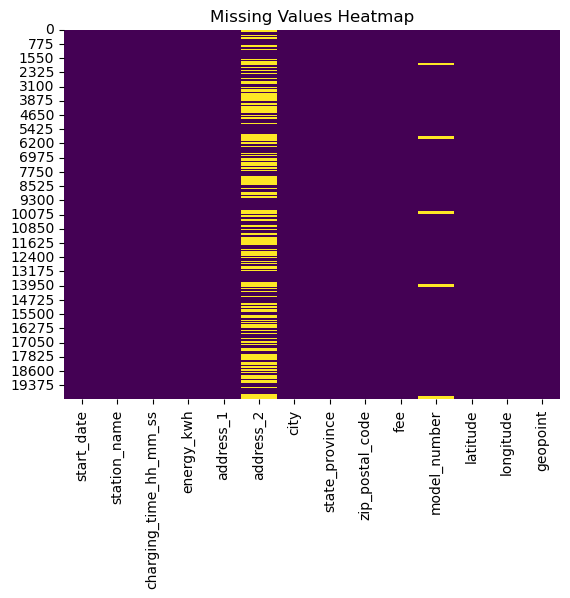

Remaining Columns: Index(['start_date', 'station_name', 'charging_time_hh_mm_ss', 'energy_kwh',
       'address_1', 'address_2', 'zip_postal_code', 'model_number', 'latitude',
       'longitude', 'geopoint'],
      dtype='object')


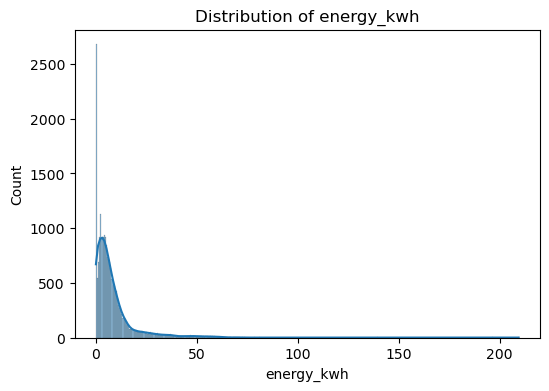

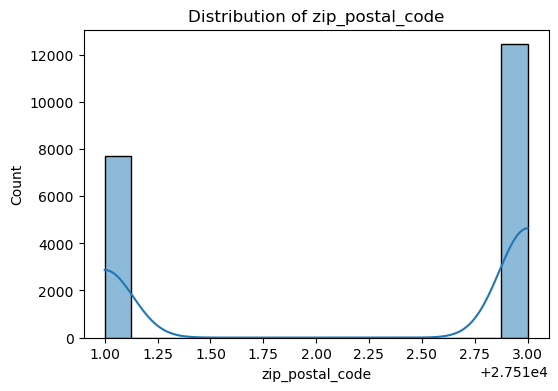

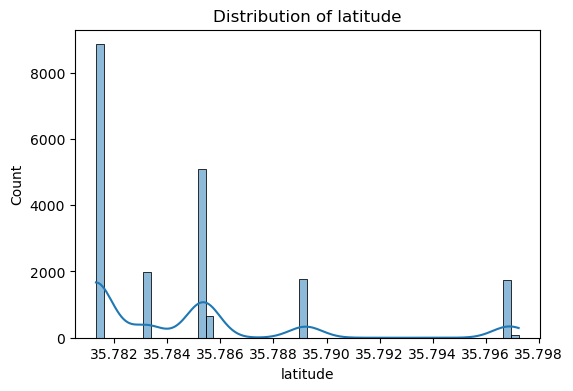

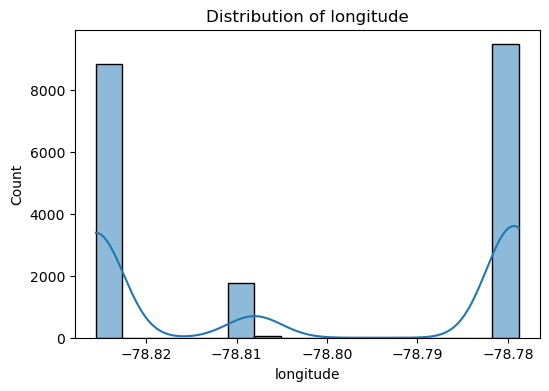

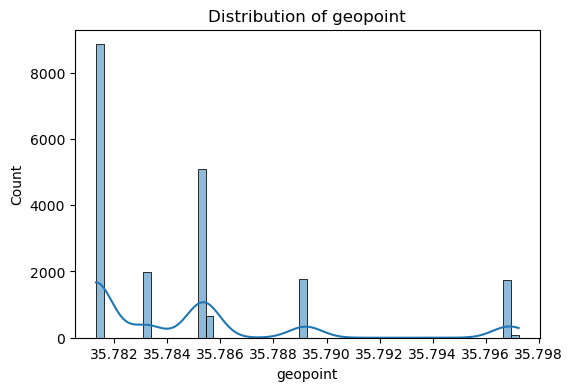

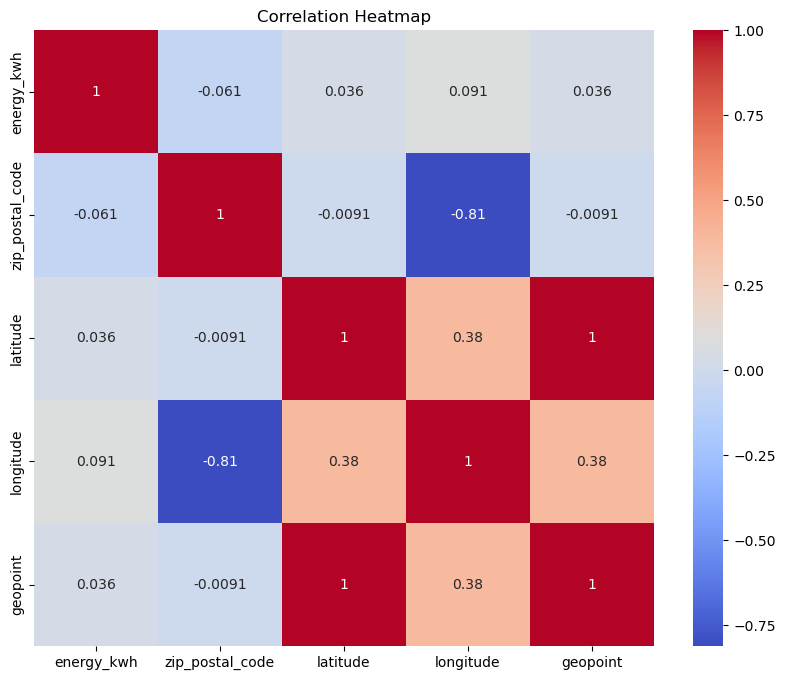

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\prana\\Downloads\\nnn\\NLP\\Dissertation.csv' 
data = pd.read_csv(file_path)

# 1. Basic Data Overview
print("Dataset Shape:", data.shape)  # Rows and Columns
print("Column Info:")
print(data.info())  # Data types and non-null counts
print("Summary Statistics:")
print(data.describe())  # Descriptive statistics for numerical features


# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# 2. Exploratory Data Analysis (EDA)
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#data Cleaning
# Drop the specified columns
data = data.drop(['fee', 'state_province', 'city'], axis=1)

# Verify the columns have been removed
print("Remaining Columns:", data.columns)

# Plot distributions for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


# Select only numerical columns for correlation matrix
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualizing Geographic Distribution of EV Charging Stations (using latitude and longitude)
map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)
map.save("ev_charger_distribution.html")

from IPython.display import IFrame
IFrame("ev_charger_distribution.html", width=1000, height=600)

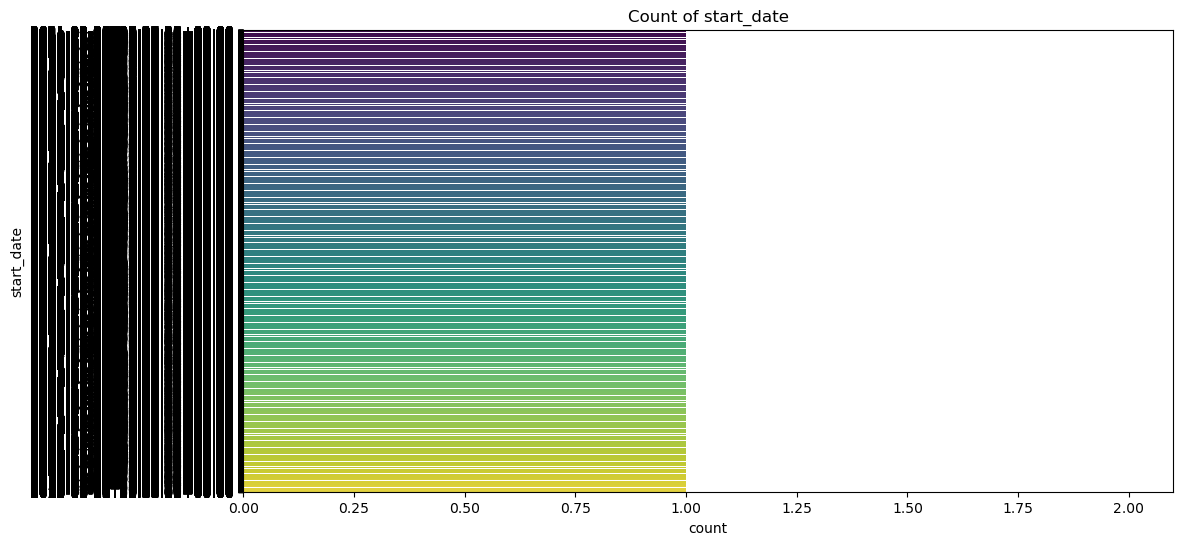

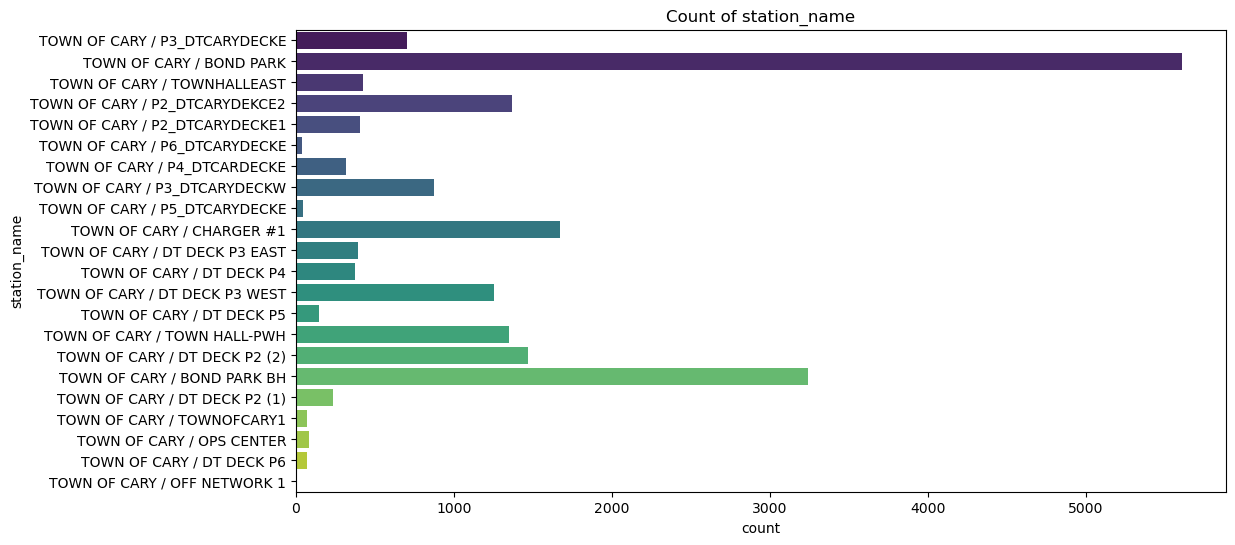

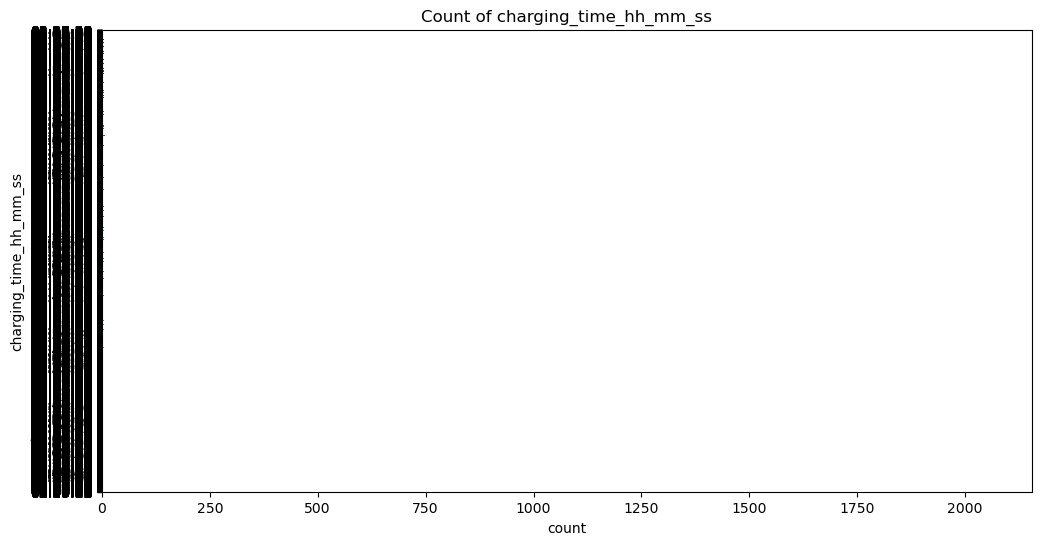

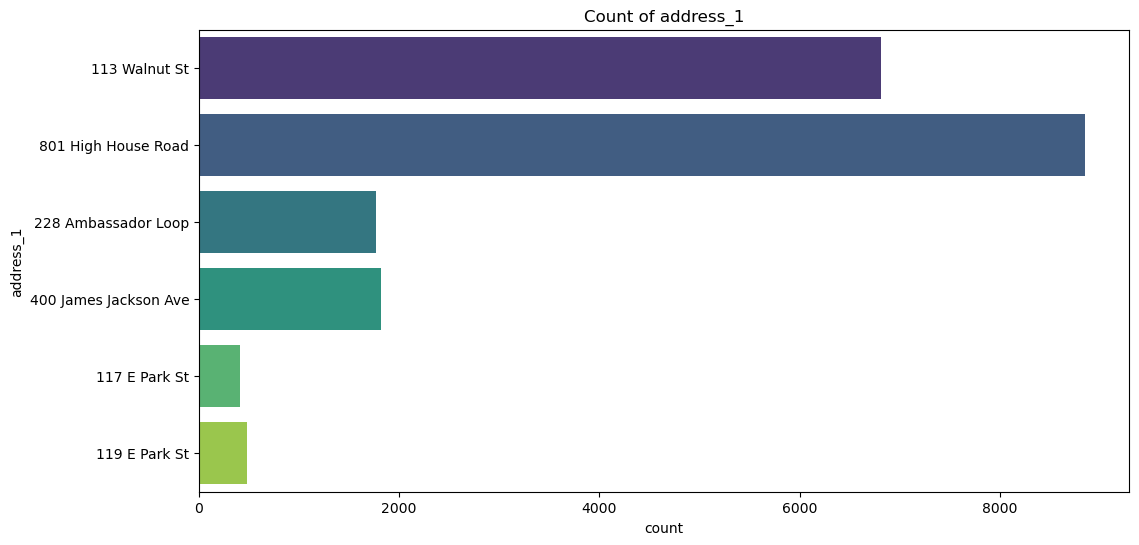

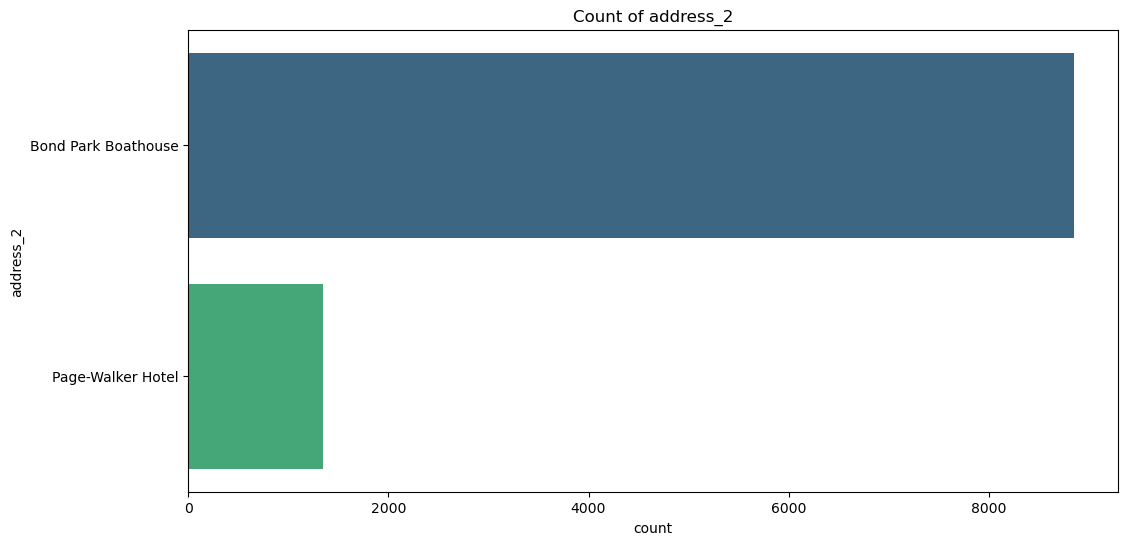

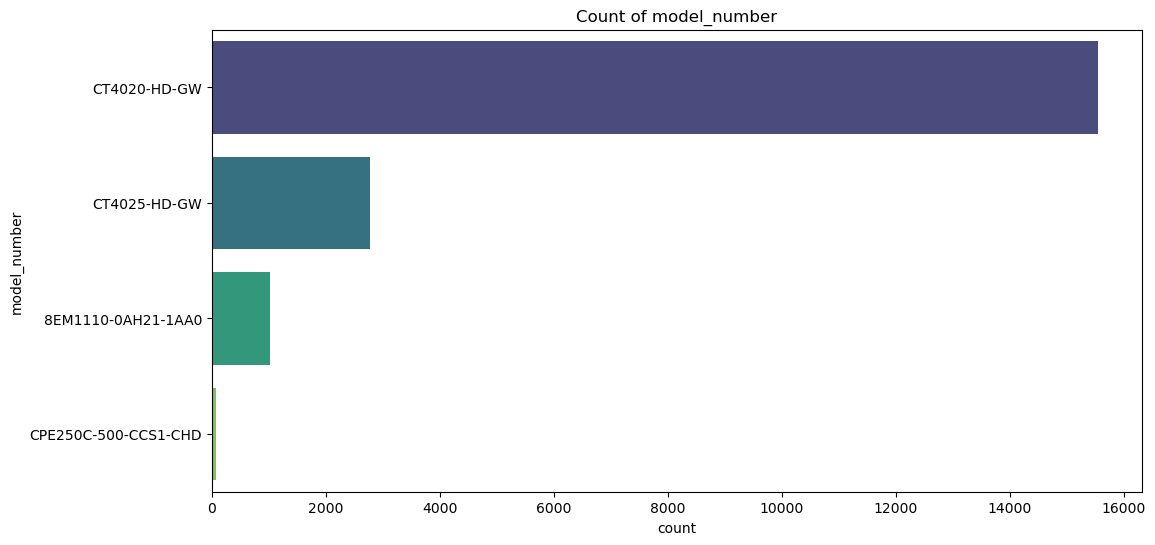

In [3]:
# Bar plots for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=data, palette='viridis')
    plt.title(f"Count of {col}")
    plt.show()

# Handle missing values (example: fillna with median for numerical, mode for categorical)
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [4]:
# Bar plots for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns

# Handle missing values (example: fillna with median for numerical, mode for categorical)
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print(data)

from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Separate numeric columns and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Handle missing values in numeric columns by filling with the mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values in categorical columns by filling with the most frequent value
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check if any missing values remain
print(data.isnull().sum())


# Encode categorical variables
label_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_enc.fit_transform(data[col])

# Automatically select numeric columns for scaling
numeric_features = data.select_dtypes(include=[np.number]).columns

# Scale numeric features
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

                      start_date                    station_name  \
0      2021-04-06T17:07:16+00:00   TOWN OF CARY / P3_DTCARYDECKE   
1      2021-04-06T17:04:30+00:00   TOWN OF CARY / P3_DTCARYDECKE   
2      2021-04-05T18:43:28+00:00        TOWN OF CARY / BOND PARK   
3      2021-04-05T11:22:47+00:00        TOWN OF CARY / BOND PARK   
4      2021-04-05T00:43:39+00:00     TOWN OF CARY / TOWNHALLEAST   
...                          ...                             ...   
20137  2022-01-13T21:27:06+00:00       TOWN OF CARY / DT DECK P4   
20138  2022-09-29T23:57:10+00:00       TOWN OF CARY / DT DECK P4   
20139  2022-10-25T21:40:28+00:00       TOWN OF CARY / DT DECK P4   
20140  2022-12-21T22:41:16+00:00  TOWN OF CARY / DT DECK P3 WEST   
20141  2022-12-31T15:08:58+00:00  TOWN OF CARY / DT DECK P3 WEST   

      charging_time_hh_mm_ss  energy_kwh            address_1  \
0                   00:00:00       0.000        113 Walnut St   
1                   00:00:00       0.000        113 W

In [5]:
# Support Vector Regressor (SVM)
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(['energy_kwh'], axis=1) 
y = data['energy_kwh']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM
svm_model = SVR(kernel='rbf')  # You can try different kernels such as 'linear' or 'poly'
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("Support Vector Regressor (SVM) Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, svm_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, svm_pred))}")
print(f"R^2 Score: {r2_score(y_test, svm_pred)}")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R^2 Score: {r2_score(y_test, rf_pred)}")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, gb_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, gb_pred))}")
print(f"R^2 Score: {r2_score(y_test, gb_pred)}")


Support Vector Regressor (SVM) Results:
Mean Squared Error: 0.152503758345556
Root Mean Squared Error: 0.39051729583407185
R^2 Score: 0.8414429821658179
Random Forest Results:
Mean Squared Error: 0.07541975074441162
Root Mean Squared Error: 0.2746265659844503
R^2 Score: 0.9215866487910741
Gradient Boosting Results:
Mean Squared Error: 0.0755230432198805
Root Mean Squared Error: 0.2748145615135423
R^2 Score: 0.9214792563762725


Simulating 'population_density' column.
Simulating 'ev_adoption_rate' column.
   latitude  longitude  distance_to_nearest_charger  underserved_score
0 -0.339454   1.039291                     0.445793           0.083976
1 -0.339454   1.039291                     0.445793           0.715595
2 -0.757409  -1.054970                     2.255769           0.022783
3 -0.757409  -1.054970                     2.255769           0.777550
4  0.983044   1.059651                     0.000000           0.809214


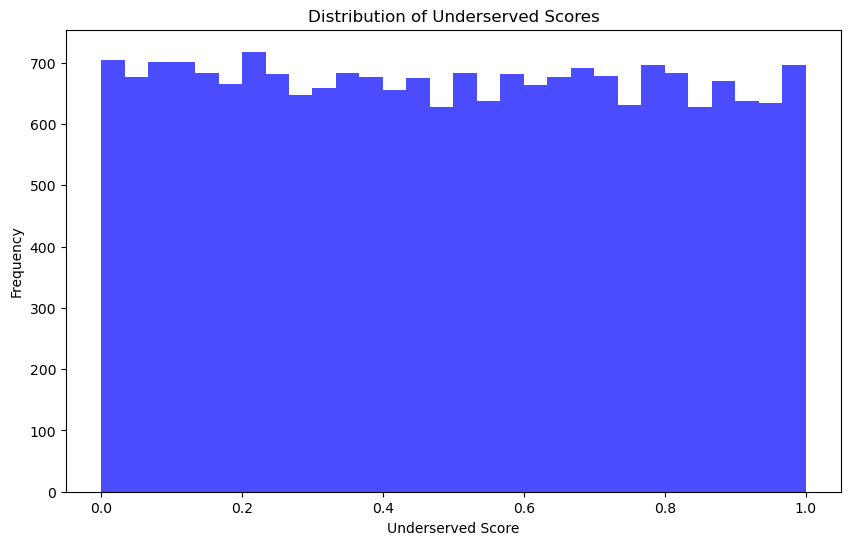

In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Ensure we have a column representing chargers
if "geopoint" not in data.columns:
    raise ValueError("Dataset does not have a column representing charger usage (e.g., 'energy_kwh').")

# Charger locations: where energy_kwh > 0
charger_locations = data[data["geopoint"] > 0][["latitude", "longitude"]]

# Potential locations: all rows (replace if filtering is needed)
potential_locations = data[["latitude", "longitude"]]

# Handle empty charger locations
if charger_locations.empty:
    raise ValueError("No charger locations found in the dataset.")

# Compute distances to the nearest charger using Nearest Neighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(charger_locations)
distances, indices = nbrs.kneighbors(potential_locations)

# Add the distances to the dataset
data["distance_to_nearest_charger"] = distances

# Simulate columns if missing
if "population_density" not in data.columns:
    print("Simulating 'population_density' column.")
    data["population_density"] = np.random.randint(100, 10000, size=len(data))

if "ev_adoption_rate" not in data.columns:
    print("Simulating 'ev_adoption_rate' column.")
    data["ev_adoption_rate"] = np.random.uniform(0.01, 0.3, size=len(data))


# Define an Underserved Score 
data["underserved_score"] = (
    0.4 * data["population_density"]
    + 0.3 * data["ev_adoption_rate"]
    + 0.3 * data["distance_to_nearest_charger"]
)

# Normalize the underserved score for comparison
data["underserved_score"] = (
    (data["underserved_score"] - data["underserved_score"].min())
    / (data["underserved_score"].max() - data["underserved_score"].min())
)

# Check the results
print(data[["latitude", "longitude", "distance_to_nearest_charger", "underserved_score"]].head())

# Visualize the distribution of the underserved score
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data["underserved_score"], bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Underserved Scores")
plt.xlabel("Underserved Score")
plt.ylabel("Frequency")
plt.show()

In [7]:
#test
test_EV = np.array([[
    -0.047283,  # start_date
    1.244225,   # station_name
    -1.330790,  # charging_time_hh_mm_ss
    -1.294701,  # address_1
    -0.267709,  # address_2
    -1.271292,  # zip_postal_code
    -0.055951,  # model_number
    -0.339454,  # latitude
    1.039291,   # longitude
    -0.339454,  # geopoint
]])

predicted_energy_kwh = rf_model.predict(test_EV)
print("Predicted Energy (kWh):", predicted_energy_kwh)

Predicted Energy (kWh): [-0.79600908]


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [8]:
# Using the test dataset for energy prediction

# Load the test dataset to inspect its structure
import pandas as pd

# File path for the uploaded test dataset
test_file_path = "C:\\Users\\prana\\Downloads\\nnn\\NLP\\Dissertation test dataset.csv"

# Load the test dataset
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the test dataset for inspection
test_data.head(), test_data.info()

from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

#data Cleaning
# Drop the specified columns
test_data = test_data.drop(['fee', 'state_province', 'city'], axis=1)

# Copy the test dataset to avoid altering the original
test_data_processed = test_data.copy()

# Separate numeric and categorical columns
numeric_cols = test_data_processed.select_dtypes(include=[np.number]).columns
categorical_cols = test_data_processed.select_dtypes(exclude=[np.number]).columns

# Handle missing values
# Fill numeric columns with the mean
test_data_processed[numeric_cols] = test_data_processed[numeric_cols].fillna(test_data_processed[numeric_cols].mean())

# Fill categorical columns with the mode
for col in categorical_cols:
    test_data_processed[col] = test_data_processed[col].fillna(test_data_processed[col].mode()[0])

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    test_data_processed[col] = le.fit_transform(test_data_processed[col])
    label_encoders[col] = le  # Save the encoder for reference

# Scale numerical columns (excluding the target variable if present)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(test_data_processed[numeric_cols])

# Replace scaled numeric columns in the DataFrame
test_data_processed[numeric_cols] = scaled_features

# Drop the target column 'energy_kwh' for predictions
X_test_dataset = test_data_processed.drop(columns=["energy_kwh"])

# Load rf_model and predict
rf_model_predictions = rf_model.predict(X_test_dataset)

# Add predictions back to the test dataset
test_data["Predicted_energy_kwh"] = rf_model_predictions

# Display the updated test dataset with predictions
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5139 entries, 0 to 5138
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_date              5139 non-null   object 
 1   station_name            5139 non-null   object 
 2   charging_time_hh_mm_ss  5139 non-null   object 
 3   energy_kwh              5139 non-null   float64
 4   address_1               5139 non-null   object 
 5   address_2               2458 non-null   object 
 6   city                    5139 non-null   object 
 7   state_province          5139 non-null   object 
 8   zip_postal_code         5139 non-null   int64  
 9   fee                     5139 non-null   int64  
 10  model_number            4991 non-null   object 
 11  latitude                5139 non-null   float64
 12  longitude               5139 non-null   float64
 13  geopoint                5139 non-null   float64
dtypes: float64(4), int64(2), object(8)
memor

,start_date,station_name,charging_time_hh_mm_ss,energy_kwh,address_1,address_2,zip_postal_code,model_number,latitude,longitude,geopoint,Predicted_energy_kwh
0,2021-07-26T14:27:35+00:00,TOWN OF CARY / BOND PARK,00:23:59,1.467,801 High House Road,Bond Park Boathouse,27513,CT4020-HD-GW,35.781303,-78.825554,35.781303,4.636633
1,2021-07-25T16:58:53+00:00,TOWN OF CARY / BOND PARK,00:03:07,0.350,801 High House Road,Bond Park Boathouse,27513,CT4020-HD-GW,35.781303,-78.825554,35.781303,4.636633
2,2021-07-25T01:22:20+00:00,TOWN OF CARY / P2_DTCARYDEKCE2,00:31:27,3.157,113 Walnut St,NaN,27511,CT4020-HD-GW,35.785385,-78.779701,35.785385,3.558751
3,2021-07-24T20:48:20+00:00,TOWN OF CARY / P3_DTCARYDECKW,00:15:25,0.869,113 Walnut St,NaN,27511,CT4025-HD-GW,35.785282,-78.779282,35.785282,3.569085
4,2021-07-23T22:56:31+00:00,TOWN OF CARY / P3_DTCARYDECKW,00:34:37,3.059,113 Walnut St,NaN,27511,CT4025-HD-GW,35.785282,-78.779282,35.785282,3.569085


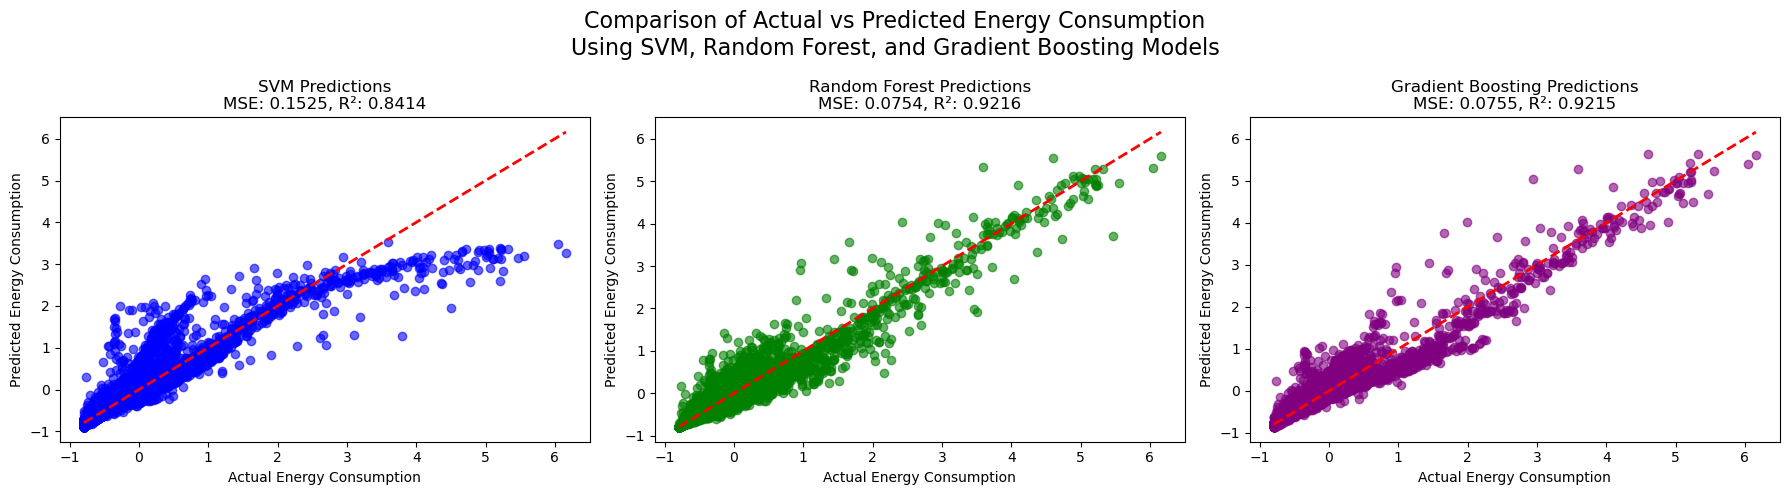

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot comparison of actual vs predicted energy consumption for the three models
def plot_comparison(y_test, svm_pred, rf_pred, gb_pred):
    """
    Plots comparison of predicted vs actual values for SVM, Random Forest, and Gradient Boosting models.
    Args:
        y_test: Actual target values from the test set
        svm_pred: Predictions made by SVM
        rf_pred: Predictions made by Random Forest Regressor
        gb_pred: Predictions made by Gradient Boosting Regressor
    """
    
    # Create subplots for visualization
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Plot SVM predictions
    axs[0].scatter(y_test, svm_pred, color='blue', alpha=0.6)
    axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
    axs[0].set_xlabel('Actual Energy Consumption')
    axs[0].set_ylabel('Predicted Energy Consumption')
    axs[0].set_title(f"SVM Predictions\nMSE: {mean_squared_error(y_test, svm_pred):.4f}, R²: {r2_score(y_test, svm_pred):.4f}")

    # Plot Random Forest predictions
    axs[1].scatter(y_test, rf_pred, color='green', alpha=0.6)
    axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
    axs[1].set_xlabel('Actual Energy Consumption')
    axs[1].set_ylabel('Predicted Energy Consumption')
    axs[1].set_title(f"Random Forest Predictions\nMSE: {mean_squared_error(y_test, rf_pred):.4f}, R²: {r2_score(y_test, rf_pred):.4f}")

    # Plot Gradient Boosting predictions
    axs[2].scatter(y_test, gb_pred, color='purple', alpha=0.6)
    axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
    axs[2].set_xlabel('Actual Energy Consumption')
    axs[2].set_ylabel('Predicted Energy Consumption')
    axs[2].set_title(f"Gradient Boosting Predictions\nMSE: {mean_squared_error(y_test, gb_pred):.4f}, R²: {r2_score(y_test, gb_pred):.4f}")

    # Set common title
    fig.suptitle("Comparison of Actual vs Predicted Energy Consumption\nUsing SVM, Random Forest, and Gradient Boosting Models", fontsize=16)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to visualize the comparison
plot_comparison(y_test, svm_pred, rf_pred, gb_pred)

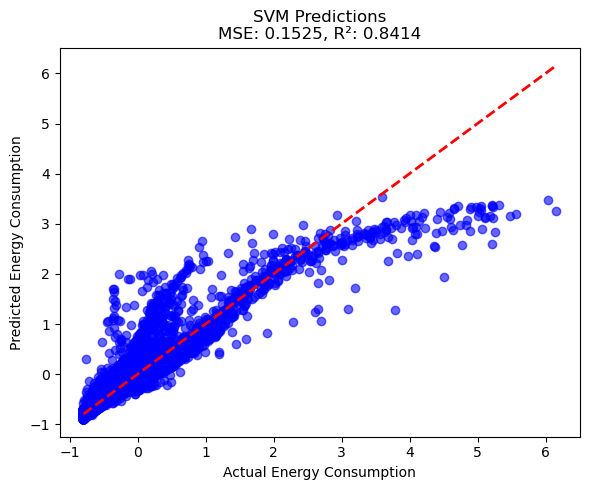

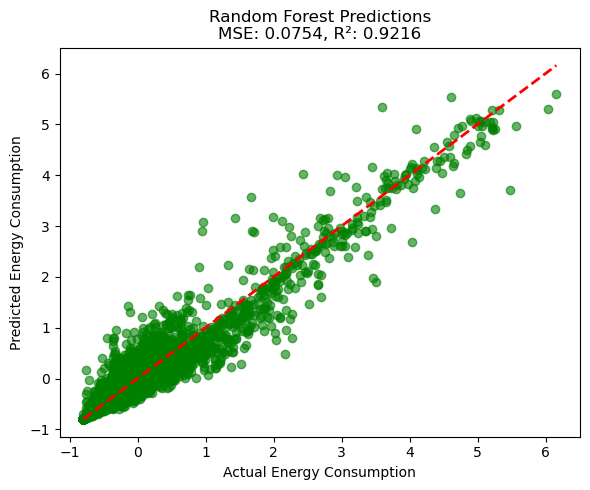

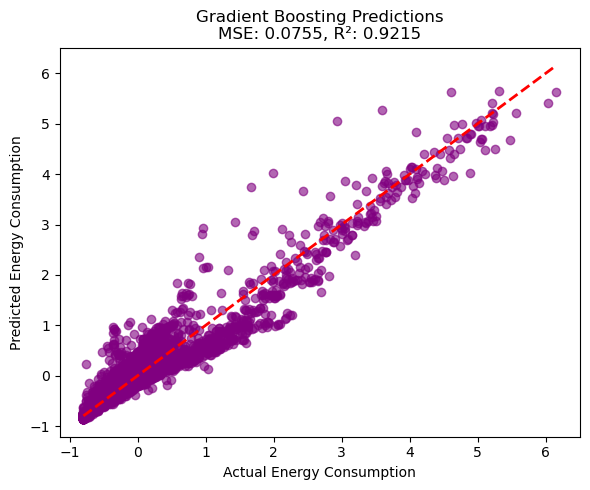

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


# Function to plot SVM comparison
def plot_svm_comparison(y_test, svm_pred):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, svm_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
    plt.xlabel('Actual Energy Consumption')
    plt.ylabel('Predicted Energy Consumption')
    plt.title(f"SVM Predictions\nMSE: {mean_squared_error(y_test, svm_pred):.4f}, R²: {r2_score(y_test, svm_pred):.4f}")
    plt.tight_layout()
    plt.show()


# Function to plot Random Forest comparison
def plot_rf_comparison(y_test, rf_pred):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, rf_pred, color='green', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
    plt.xlabel('Actual Energy Consumption')
    plt.ylabel('Predicted Energy Consumption')
    plt.title(f"Random Forest Predictions\nMSE: {mean_squared_error(y_test, rf_pred):.4f}, R²: {r2_score(y_test, rf_pred):.4f}")
    plt.tight_layout()
    plt.show()


# Function to plot Gradient Boosting comparison
def plot_gb_comparison(y_test, gb_pred):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, gb_pred, color='purple', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
    plt.xlabel('Actual Energy Consumption')
    plt.ylabel('Predicted Energy Consumption')
    plt.title(f"Gradient Boosting Predictions\nMSE: {mean_squared_error(y_test, gb_pred):.4f}, R²: {r2_score(y_test, gb_pred):.4f}")
    plt.tight_layout()
    plt.show()


# Call visualization functions one by one
plot_svm_comparison(y_test, svm_pred)
plot_rf_comparison(y_test, rf_pred)
plot_gb_comparison(y_test, gb_pred)